<a href="https://colab.research.google.com/github/Kautilya03/DS_project/blob/main/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ---------------------- Block 1: Imports + Setup + Preprocessing ----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
import random
import logging
warnings.filterwarnings('ignore')
np.random.seed(42)
random.seed(42)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def preprocess_data(df):
    logging.info('Starting preprocessing...')

    df.columns = df.columns.str.strip()
    df['Itemname'] = df['Itemname'].astype(str).str.strip().str.lower()
    df['Country'] = df['Country'].astype(str).str.strip()

    df.drop_duplicates(inplace=True)

    df.dropna(inplace=True)

    df['Price'] = df['Price'].replace(',', '.', regex=True).astype(float)

    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M', errors='coerce')

    # BillNo to string
    df['BillNo'] = df['BillNo'].astype(str)

    df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

    logging.info('Preprocessing completed.')
    return df


In [ ]:
# ---------------------- Block 2: Load Data + Explore + Prepare Basket ----------------------
# Load the dataset
file_path = "/content/drive/MyDrive/Assignment-1_Data.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8-sig')

print("\n----- Dataset Head -----\n", df.head())
print("\n----- Dataset Info -----\n")
df.info()
print("\n----- Dataset Description -----\n", df.describe(include='all'))
print("\n----- Memory Usage -----\n", df.memory_usage(deep=True))

df = preprocess_data(df)


df = df[df['Country'] == 'France']


print(f"\nNumber of transactions from France: {df['BillNo'].nunique()}")


basket = df.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0)


print("\n----- Sample Basket -----\n", basket.head())

basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)



----- Dataset Head -----
    BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  01.12.2010 08:26   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom  

----- Dataset Info -----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname


----- Frequent Itemsets -----
     support                              itemsets
0  0.030848              (10 colour spaceboy pen)
1  0.023136  (12 pencils tall tube red retrospot)
2  0.035990  (3 piece spaceboy cookie cutter set)
3  0.046272       (36 pencils tube red retrospot)
4  0.023136            (36 pencils tube woodland)

----- Top Rules -----
                                              antecedents  \
7445   (set/6 red spotty paper cups, alarm clock bake...   
7444   (alarm clock bakelike green, set/6 red spotty ...   
7443   (alarm clock bakelike green, set/6 red spotty ...   
7446   (alarm clock bakelike pink, set/6 red spotty p...   
12009  (dolly girl childrens bowl, spaceboy childrens...   
12000  (spaceboy childrens bowl, postage, dolly girl ...   
6418                (postage, recycled acapulco mat red)   
6893                    (recycled acapulco mat lavender)   
6892   (recycled acapulco mat red, recycled acapulco ...   
6419                    (recycled acapulco m

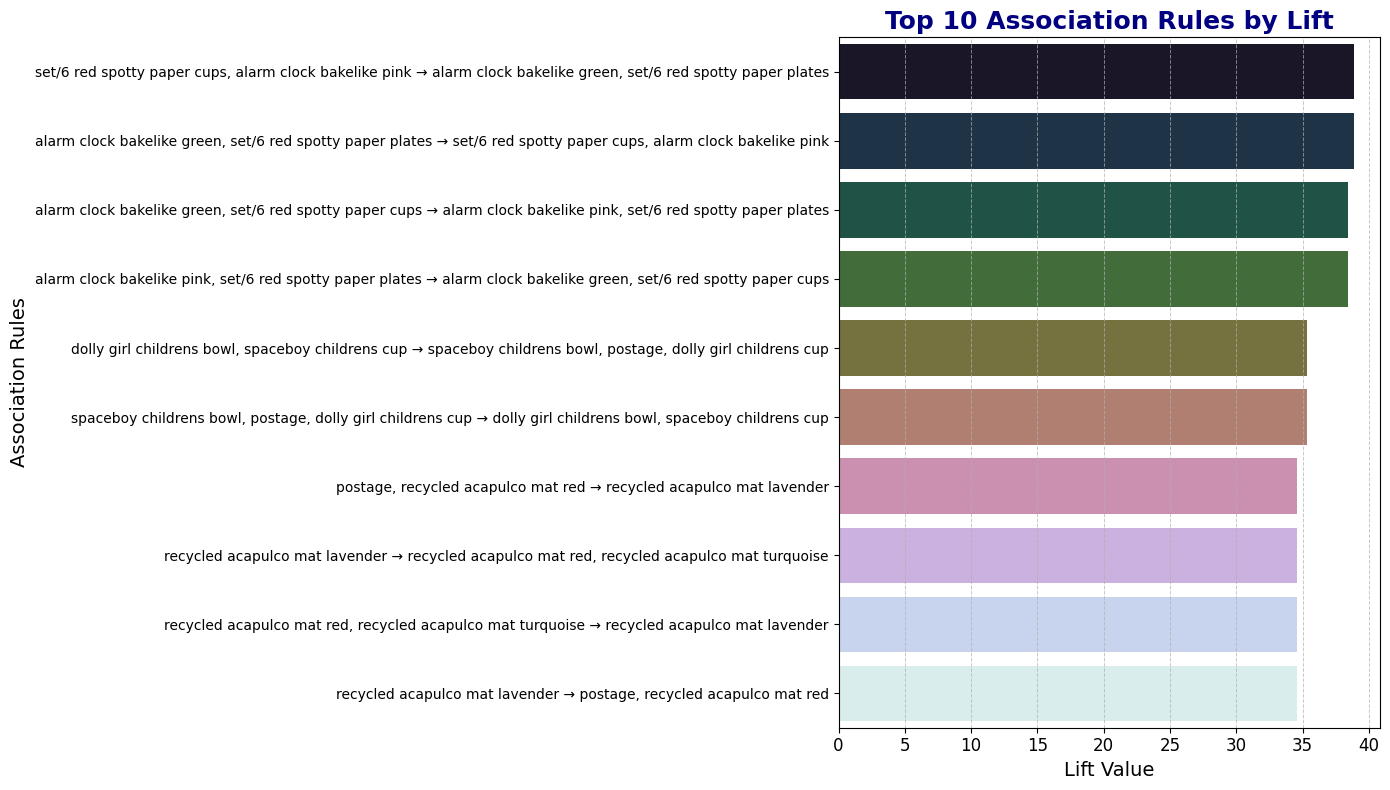

In [ ]:
# ---------------------- Block 3: Frequent Itemsets + Rules + Visualization ----------------------
# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(basket_binary, min_support=0.02, use_colnames=True)

# Preview frequent itemsets
print("\n----- Frequent Itemsets -----\n", frequent_itemsets.head())

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

top_rules = rules.sort_values('lift', ascending=False).head(10)

print("\n----- Top Rules -----\n", top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

plt.figure(figsize=(14,8))
sns.barplot(
    x=top_rules['lift'],
    y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " +
      top_rules['consequents'].apply(lambda x: ', '.join(list(x))),
    palette="cubehelix"
)
plt.title('Top 10 Association Rules by Lift', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Lift Value', fontsize=14)
plt.ylabel('Association Rules', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

logging.info('Association rule mining completed.')



----- Top Rules by Confidence -----
                                              antecedents  \
0                               (10 colour spaceboy pen)   
5277   (set/6 red spotty paper cups, pack of 20 napki...   
5278   (set/6 red spotty paper plates, pack of 20 nap...   
10532  (pack of 6 skull paper cups, set of 9 black sk...   
10533  (pack of 6 skull paper cups, set of 9 black sk...   
5254   (set/20 red retrospot paper napkins, pack of 2...   
5260   (set/6 red spotty paper cups, pack of 20 napki...   
5234   (mini paint set vintage, set/6 red spotty pape...   
5235   (mini paint set vintage, set/20 red retrospot ...   
5242   (mini paint set vintage, set/6 red spotty pape...   

                                consequents   support  confidence      lift  
0                                 (postage)  0.030848         1.0  1.296667  
5277        (set/6 red spotty paper plates)  0.020566         1.0  7.780000  
5278          (set/6 red spotty paper cups)  0.020566         1.0  

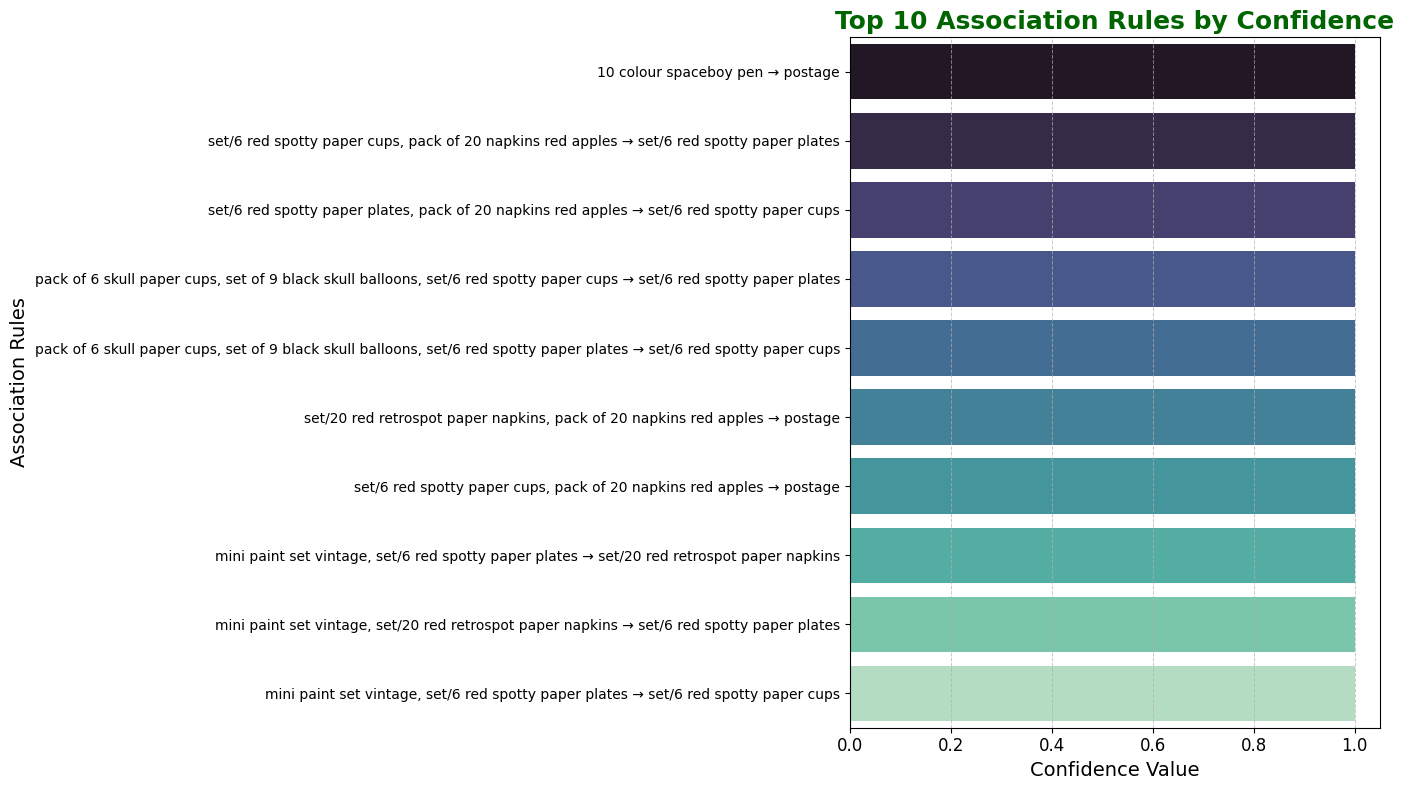

In [ ]:
# ---------------------- Block 4: Association Rules Based on Confidence ----------------------

top_confidence_rules = rules.sort_values('confidence', ascending=False).head(10)

print("\n----- Top Rules by Confidence -----\n", top_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

plt.figure(figsize=(14,8))
sns.barplot(
    x=top_confidence_rules['confidence'],
    y=top_confidence_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " +
      top_confidence_rules['consequents'].apply(lambda x: ', '.join(list(x))),
    palette="mako"
)
plt.title('Top 10 Association Rules by Confidence', fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel('Confidence Value', fontsize=14)
plt.ylabel('Association Rules', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

logging.info('High-confidence association rule analysis completed.')


Plotting 60 rules


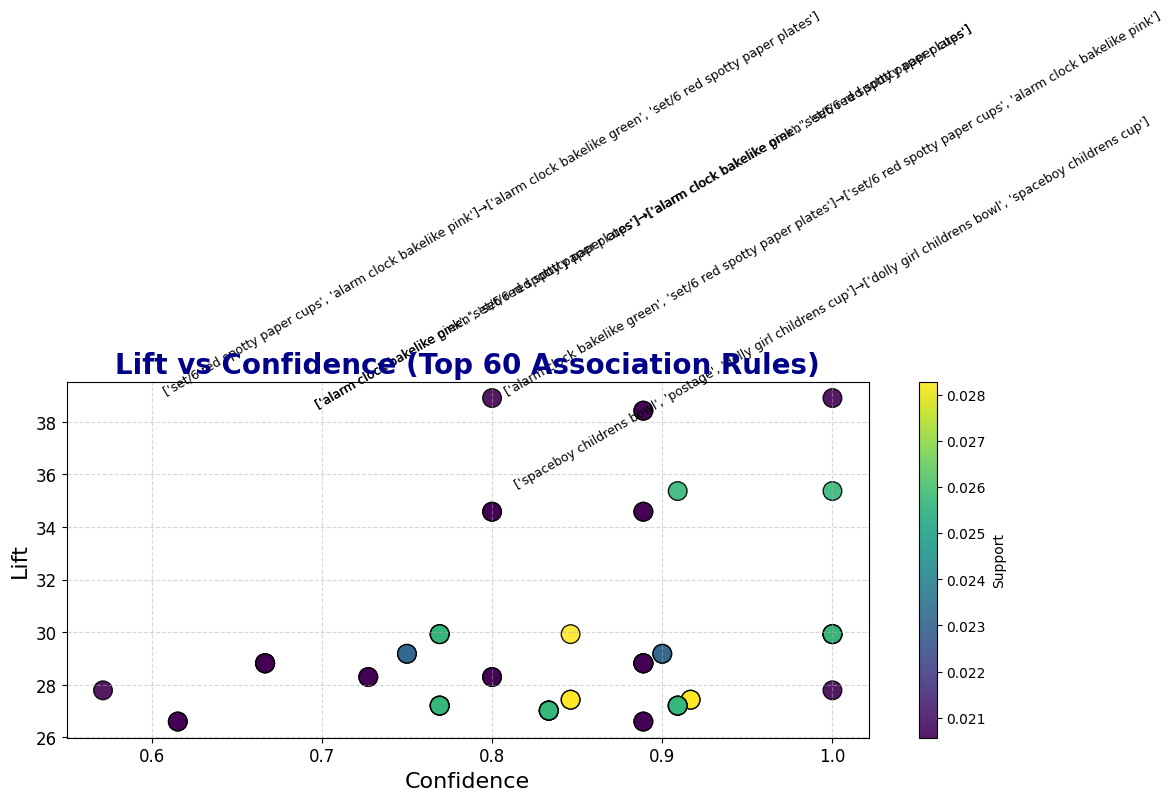

In [ ]:
# ---------------------- Final Block 5: Only 60 Points Scatter Plot ----------------------

filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['support'] > 0.01)]

filtered_rules = filtered_rules.sort_values('lift', ascending=False).head(60)

print(f"Plotting {len(filtered_rules)} rules")

plt.figure(figsize=(12,8))

scatter = plt.scatter(
    filtered_rules['confidence'],
    filtered_rules['lift'],
    c=filtered_rules['support'],
    cmap='viridis',
    edgecolor='black',
    alpha=0.9,
    s=180
)

plt.title('Lift vs Confidence (Top 60 Association Rules)', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Confidence', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.colorbar(scatter, label='Support')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

top5_filtered = filtered_rules.head(5)
for i, rule in top5_filtered.iterrows():
    plt.text(rule['confidence'], rule['lift'], str(list(rule['antecedents'])) + "→" + str(list(rule['consequents'])),
             fontsize=9, ha='center', va='bottom', color='black', rotation=30)

plt.tight_layout()
plt.show()

# Log success
logging.info('Top 60 filtered scatter plot created successfully.')
